In [40]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
from collections import Counter
from sklearn.cluster import KMeans  # Import KMeans from sklearn.cluster
from src.utils_clustering_v2 import map_clusters_to_ground_truth
import pandas as pd
from src.utils_clustering import *
import time

In [42]:
N_CLASSES = 15

In [43]:
DATASET_FILE_NAME = "s1"
file_path = rf'..\data\processed\{DATASET_FILE_NAME}.txt'
processed_data = pd.read_csv(file_path)

In [44]:
# Start measuring time
start_time = time.time()

kmeans_clustering = KMeans(n_clusters=N_CLASSES, random_state=42, n_init=10)
labels_pred = kmeans_clustering.fit_predict(processed_data)

# Measure elapsed time
end_time = time.time()
running_time = end_time - start_time
running_time_in_seconds = running_time / 60
running_time_in_seconds

0.0009228984514872233

In [45]:
print(labels_pred[:5])

[0 0 0 0 0]


In [46]:
cluster_distribution = Counter(labels_pred)
print("Predicted Distribution: ",cluster_distribution)

Predicted Distribution:  Counter({7: 352, 10: 351, 8: 351, 5: 349, 13: 345, 9: 341, 3: 340, 14: 335, 6: 334, 1: 329, 11: 327, 12: 319, 2: 316, 4: 314, 0: 297})


In [47]:
LABELS_FILE_NAME = 's1-label'
labels_true = load_labels_from_file(rf'..\data\label\{LABELS_FILE_NAME}.pa', len(labels_pred))
cluster_distribution = Counter(labels_true)
print(cluster_distribution)

Counter({13: 350, 14: 350, 15: 350, 12: 349, 11: 347, 10: 342, 9: 341, 8: 338, 7: 334, 6: 326, 5: 325, 4: 318, 2: 316, 3: 314, 1: 300})


In [48]:
clustering_algorithm_name = 'KMeans_clustering'
dataset_name = DATASET_FILE_NAME
results_path = r'../results/metrics/results.csv'

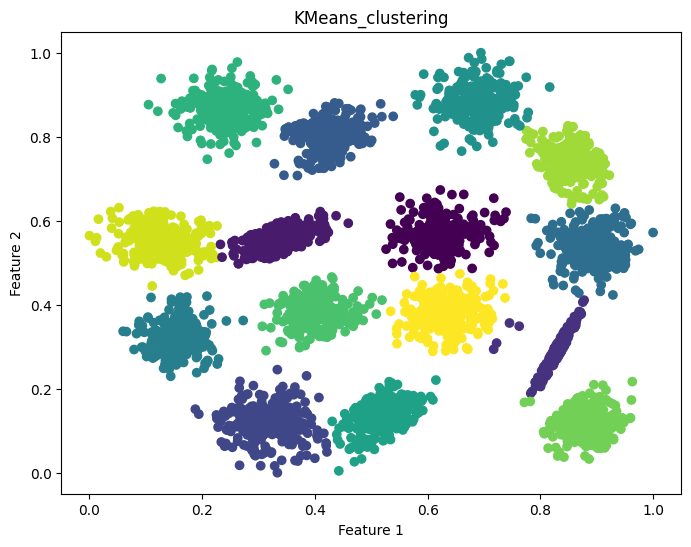

In [49]:
plot_clusters(processed_data, labels_pred, title=clustering_algorithm_name)

In [50]:
labels_pred = map_clusters_to_ground_truth(labels_true, labels_pred)

Confusion Matrix:


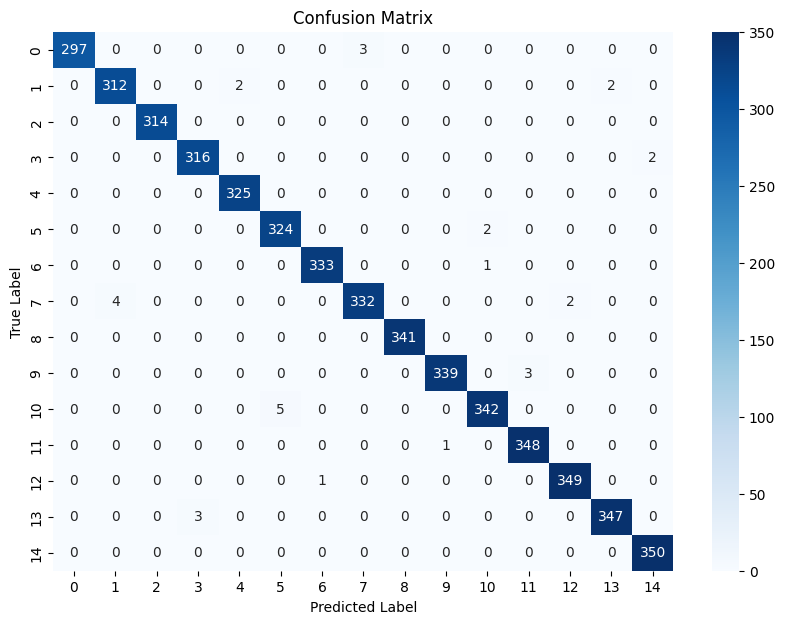


Overall Accuracy: 99.38%
This represents the proportion of all data points that were correctly grouped by the clustering algorithm.


In [51]:
generate_confusion_matrix(labels_true, labels_pred, N_CLASSES)

In [52]:
algorithm_params = kmeans_clustering.get_params()
algorithm_details = str(algorithm_params)

In [53]:
# Evaluate and save results
evaluate_clustering(X=processed_data, labels_true=labels_true, labels_pred=labels_pred,
                    clus_algo_name=clustering_algorithm_name, dataset_name=dataset_name, 
                    results_path=results_path, algorithm_details=algorithm_details, 
                    running_time=running_time)


<h1 style="text-align: justify;">
<center>
  SHIFTS
</center>
</h1>


## Knock out 

### Knock out class 1

In [54]:
import numpy as np
import pandas as pd

# Ensure labels_true is a NumPy array for consistent operation
# This step assumes labels_true was loaded properly before
# If labels_true is not an array, convert it appropriately
# labels_true = np.array(labels_true_loaded)

target_class = 1
delta_ko = 0.9  # Fraction to remove 0.2 , 0.5, 0.9

# Ensure labels_true is an array for the comparison
if not isinstance(labels_true, np.ndarray):
    labels_true = np.array(labels_true)

# Identify indices of samples belonging to the target class
target_indices = np.where(labels_true == target_class)[0]

# Calculate the number of samples to remove
num_samples_to_remove = int(len(target_indices) * delta_ko)

# Randomly select a subset of these indices to remove
np.random.seed(42)  # For reproducibility
indices_to_remove = np.random.choice(target_indices, num_samples_to_remove, replace=False)

# Remove the selected samples from processed_data and labels_true
# Note: Ensure processed_data's index aligns with labels_true for direct index-based removal
processed_data_ko = processed_data.drop(index=processed_data.index[indices_to_remove])
labels_true_ko = np.delete(labels_true, indices_to_remove)


[14 14 14 14 14]
Predicted Distribution:  Counter({9: 352, 7: 351, 3: 351, 1: 349, 13: 345, 11: 341, 12: 340, 0: 334, 10: 332, 5: 329, 4: 327, 6: 319, 8: 316, 2: 314, 14: 30})
Counter({13: 350, 14: 350, 15: 350, 12: 349, 11: 347, 10: 342, 9: 341, 8: 338, 7: 334, 6: 326, 5: 325, 4: 318, 2: 316, 3: 314, 1: 30})


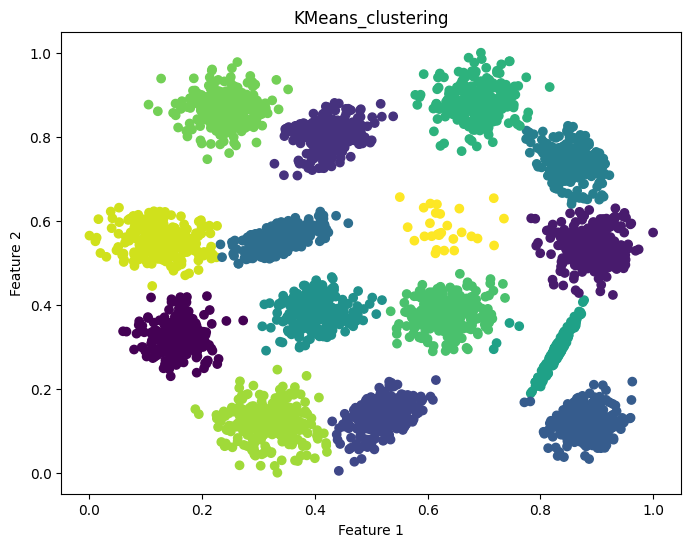

Confusion Matrix:


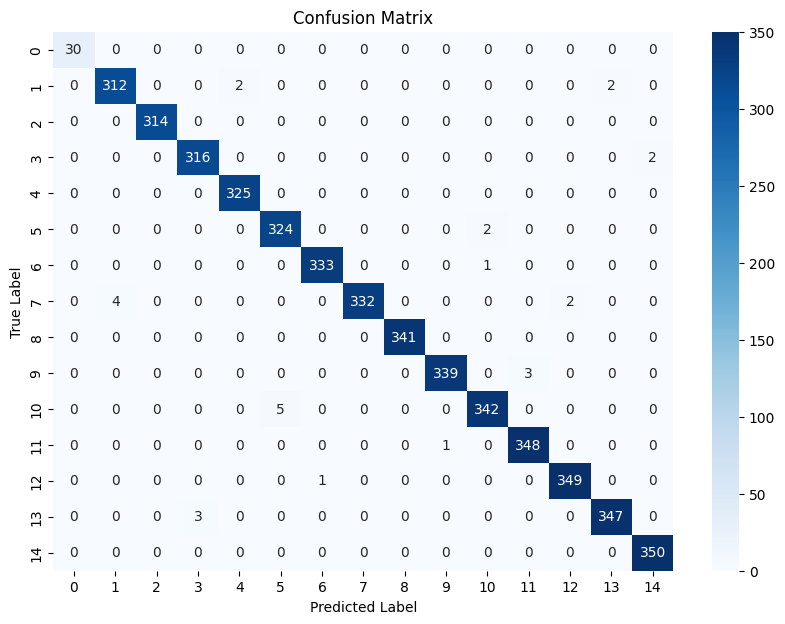


Overall Accuracy: 99.41%
This represents the proportion of all data points that were correctly grouped by the clustering algorithm.


In [55]:

start_time = time.time()

kmeans_clustering = KMeans(n_clusters=N_CLASSES, random_state=42, n_init=10)
labels_pred = kmeans_clustering.fit_predict(processed_data_ko)

# Measure elapsed time
end_time = time.time()
running_time = end_time - start_time
running_time_in_seconds = running_time / 60
running_time_in_seconds
print(labels_pred[:5])
cluster_distribution = Counter(labels_pred)
print("Predicted Distribution: ", cluster_distribution)
LABELS_FILE_NAME = 's1-label'
cluster_distribution = Counter(labels_true_ko)
print(cluster_distribution)
clustering_algorithm_name = 'KMeans_clustering'
dataset_name = DATASET_FILE_NAME
results_path = r'../results/metrics/results.csv'
plot_clusters(processed_data_ko, labels_pred, title=clustering_algorithm_name)
labels_pred = map_clusters_to_ground_truth(labels_true_ko, labels_pred)
generate_confusion_matrix(labels_true_ko, labels_pred, N_CLASSES)
algorithm_params = kmeans_clustering.get_params()
algorithm_details = str(algorithm_params)
# Evaluate and save results
evaluate_clustering(X=processed_data_ko, labels_true=labels_true_ko, labels_pred=labels_pred,
                    clus_algo_name=clustering_algorithm_name, dataset_name=dataset_name,
                    results_path=results_path, algorithm_details=algorithm_details,
                    running_time=running_time)

### Knock out all classes 0.9%

In [56]:
import numpy as np
import pandas as pd

# Ensure labels_true is a NumPy array for consistent operation
labels_true = np.array(labels_true)

np.random.seed(42)  # For reproducibility

# Define your target classes and the fractions of samples to remove
target_classes = [1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15]  # Extend or modify as needed
delta_kos = [0.9, 0.9, 0.9,0.9, 0.9, 0.9, 0.9, 0.9,0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9]  # Matching fractions for each target class

# Initialize a copy of processed_data to avoid altering the original dataset
processed_data_ko = processed_data.copy()
labels_true_ko = labels_true.copy()

for target_class, delta_ko in zip(target_classes, delta_kos):
    # Identify indices of samples belonging to the current target class
    target_indices = np.flatnonzero(labels_true_ko == target_class)  # Use np.flatnonzero for direct index extraction

    # Calculate the number of samples to remove for the current class
    num_samples_to_remove = int(len(target_indices) * delta_ko)

    # Randomly select a subset of these indices to remove
    indices_to_remove = np.random.choice(target_indices, num_samples_to_remove, replace=False)

    # Remove the selected samples from processed_data and labels_true
    # For processed_data_ko, ensure you're matching indices correctly, especially if using Pandas DataFrame
    processed_data_ko.drop(processed_data_ko.index[indices_to_remove], inplace=True)
    labels_true_ko = np.delete(labels_true_ko, indices_to_remove)

# Make sure to reset the index if you're using a Pandas DataFrame
processed_data_ko.reset_index(drop=True, inplace=True)

# Proceed with reapplying clustering or other analyses on the altered dataset


[8 8 8 8 8]
Predicted Distribution:  Counter({5: 35, 10: 35, 3: 35, 1: 35, 11: 35, 7: 35, 9: 35, 6: 34, 14: 34, 12: 33, 0: 33, 4: 32, 13: 32, 2: 32, 8: 30})
Counter({9: 35, 10: 35, 11: 35, 12: 35, 13: 35, 14: 35, 15: 35, 7: 34, 8: 34, 5: 33, 6: 33, 2: 32, 3: 32, 4: 32, 1: 30})


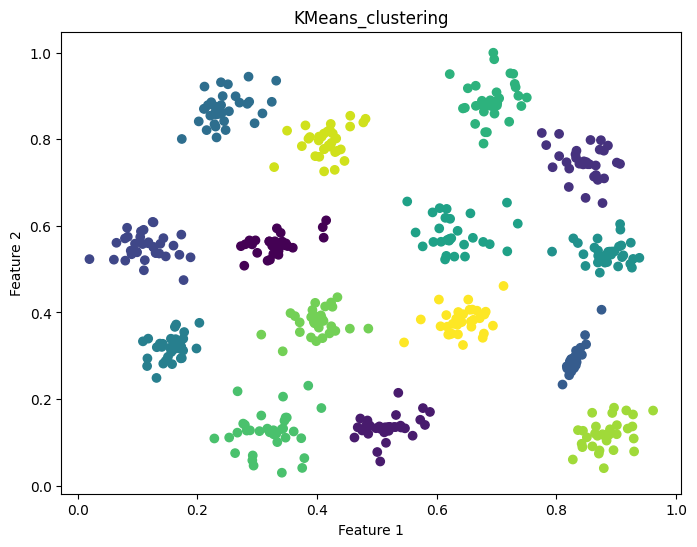

Confusion Matrix:


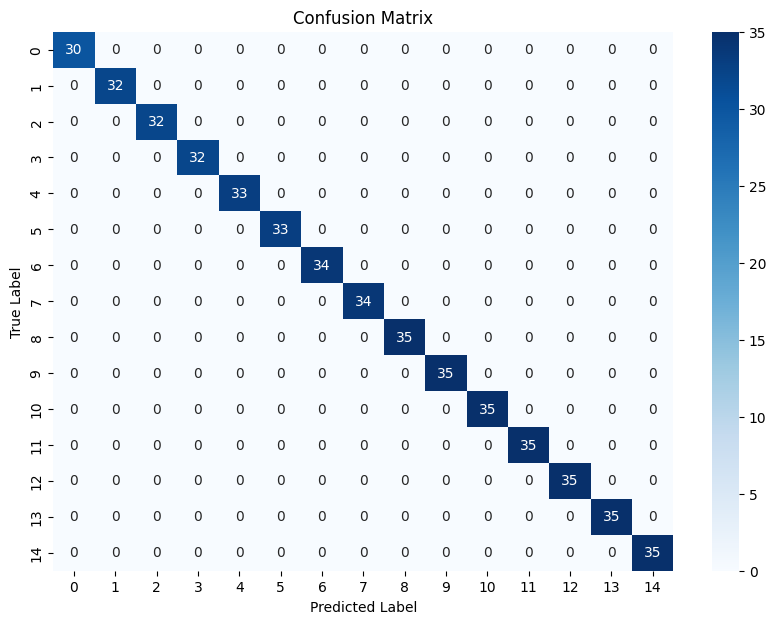


Overall Accuracy: 100.00%
This represents the proportion of all data points that were correctly grouped by the clustering algorithm.


In [57]:
start_time = time.time()

kmeans_clustering = KMeans(n_clusters=N_CLASSES, random_state=42, n_init=10)
labels_pred = kmeans_clustering.fit_predict(processed_data_ko)

# Measure elapsed time
end_time = time.time()
running_time = end_time - start_time
running_time_in_seconds = running_time / 60
running_time_in_seconds
print(labels_pred[:5])
cluster_distribution = Counter(labels_pred)
print("Predicted Distribution: ", cluster_distribution)
LABELS_FILE_NAME = 's1-label'
cluster_distribution = Counter(labels_true_ko)
print(cluster_distribution)
clustering_algorithm_name = 'KMeans_clustering'
dataset_name = DATASET_FILE_NAME
results_path = r'../results/metrics/results.csv'
plot_clusters(processed_data_ko, labels_pred, title=clustering_algorithm_name)
labels_pred = map_clusters_to_ground_truth(labels_true_ko, labels_pred)
generate_confusion_matrix(labels_true_ko, labels_pred, N_CLASSES)
algorithm_params = kmeans_clustering.get_params()
algorithm_details = str(algorithm_params)
# Evaluate and save results
evaluate_clustering(X=processed_data_ko, labels_true=labels_true_ko, labels_pred=labels_pred,
                    clus_algo_name=clustering_algorithm_name, dataset_name=dataset_name,
                    results_path=results_path, algorithm_details=algorithm_details,
                    running_time=running_time)

### Gaussian shift

[11  0 11 11 11]
Predicted Distribution:  Counter({14: 357, 1: 355, 0: 351, 3: 350, 2: 341, 4: 340, 6: 340, 12: 332, 10: 329, 13: 327, 7: 326, 8: 323, 9: 318, 5: 311, 11: 300})
Counter({13: 350, 14: 350, 15: 350, 12: 349, 11: 347, 10: 342, 9: 341, 8: 338, 7: 334, 6: 326, 5: 325, 4: 318, 2: 316, 3: 314, 1: 300})


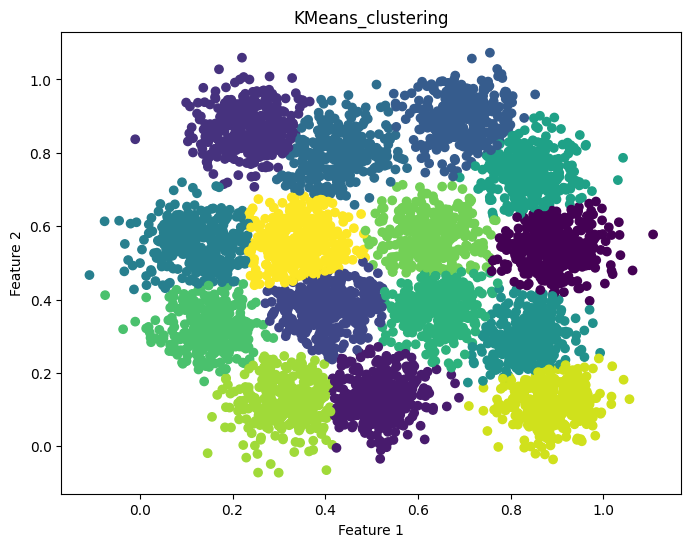

Confusion Matrix:


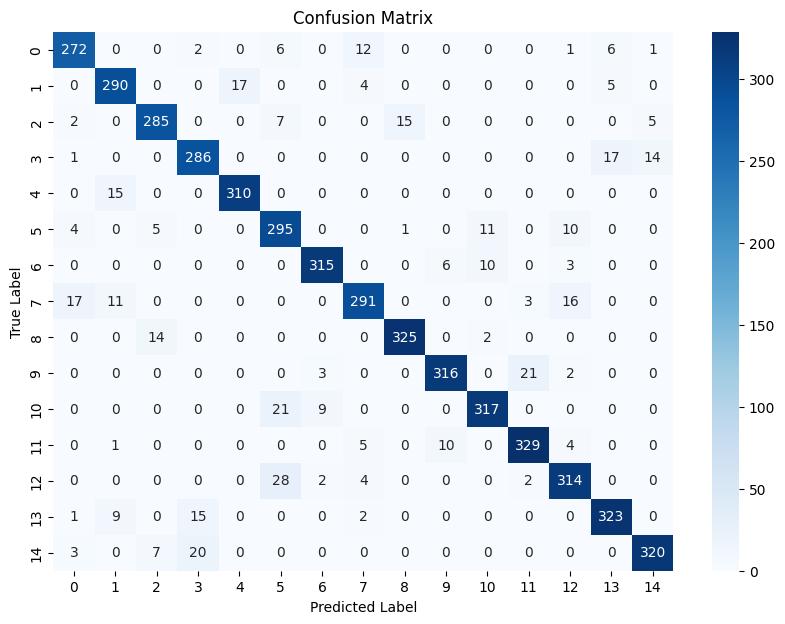


Overall Accuracy: 91.76%
This represents the proportion of all data points that were correctly grouped by the clustering algorithm.


In [74]:

# Define the standard deviation for the Gaussian noise
std_dev = 0.05  # Adjust this value based on your needs 0.01, 0.05, 0.1
processed_data = pd.read_csv(file_path)
# Add Gaussian noise
processed_data['X'] += np.random.normal(0, std_dev, processed_data.shape[0])
processed_data['Y'] += np.random.normal(0, std_dev, processed_data.shape[0])

start_time = time.time()

kmeans_clustering = KMeans(n_clusters=N_CLASSES, random_state=42, n_init=10)
labels_pred = kmeans_clustering.fit_predict(processed_data)

# Measure elapsed time
end_time = time.time()
running_time = end_time - start_time
running_time_in_seconds = running_time / 60
running_time_in_seconds
print(labels_pred[:5])
cluster_distribution = Counter(labels_pred)
print("Predicted Distribution: ", cluster_distribution)
LABELS_FILE_NAME = 's1-label'
labels_true = load_labels_from_file(rf'..\data\label\{LABELS_FILE_NAME}.pa', len(labels_pred))
cluster_distribution = Counter(labels_true)
print(cluster_distribution)
clustering_algorithm_name = 'KMeans_clustering'
dataset_name = DATASET_FILE_NAME
results_path = r'../results/metrics/results.csv'
plot_clusters(processed_data, labels_pred, title=clustering_algorithm_name)
labels_pred = map_clusters_to_ground_truth(labels_true, labels_pred)
generate_confusion_matrix(labels_true, labels_pred, N_CLASSES)
algorithm_params = kmeans_clustering.get_params()
algorithm_details = str(algorithm_params)
# Evaluate and save results
evaluate_clustering(X=processed_data, labels_true=labels_true, labels_pred=labels_pred,
                    clus_algo_name=clustering_algorithm_name, dataset_name=dataset_name,
                    results_path=results_path, algorithm_details=algorithm_details,
                    running_time=running_time)

In [58]:


# Define the standard deviation for the Gaussian noise
std_dev = 0.1 # Adjust this value based on your needs 0.01, 0.05, 0.1
processed_data = pd.read_csv(file_path)
# Add Gaussian noise
processed_data['X'] += np.random.normal(0, std_dev, processed_data.shape[0])
processed_data['Y'] += np.random.normal(0, std_dev, processed_data.shape[0])


[ 8  7 13 11 10]
Predicted Distribution:  Counter({2: 411, 9: 390, 0: 348, 6: 346, 7: 342, 3: 338, 1: 334, 8: 333, 4: 321, 11: 320, 13: 317, 14: 316, 12: 307, 5: 303, 10: 274})
Counter({13: 350, 14: 350, 15: 350, 12: 349, 11: 347, 10: 342, 9: 341, 8: 338, 7: 334, 6: 326, 5: 325, 4: 318, 2: 316, 3: 314, 1: 300})


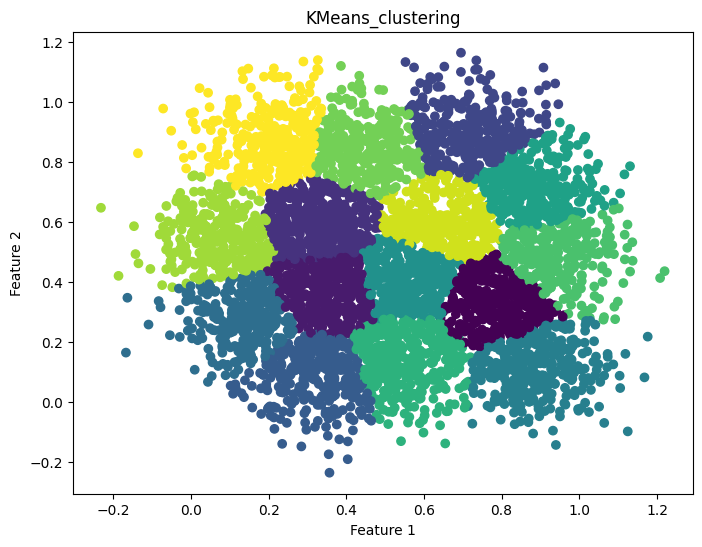

Confusion Matrix:


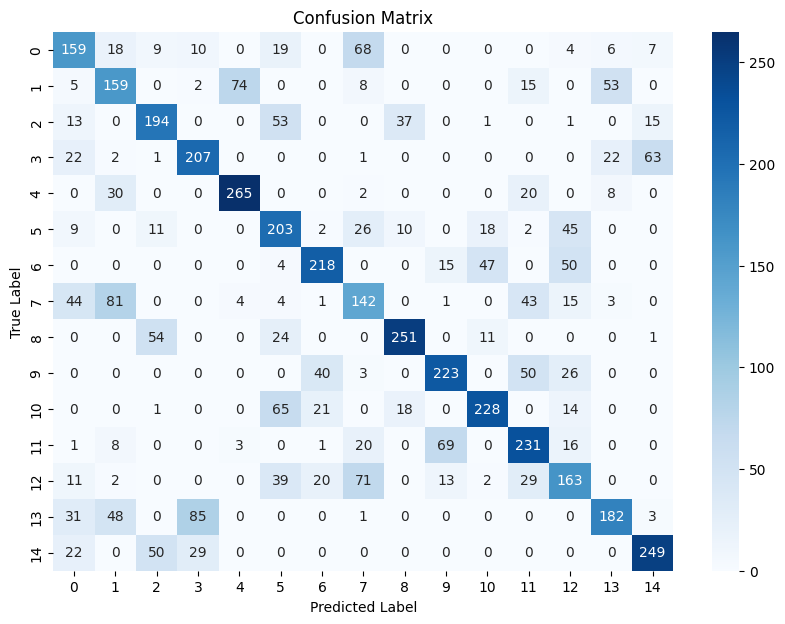


Overall Accuracy: 61.48%
This represents the proportion of all data points that were correctly grouped by the clustering algorithm.


In [59]:
start_time = time.time()

kmeans_clustering = KMeans(n_clusters=N_CLASSES, random_state=42, n_init=10)
labels_pred = kmeans_clustering.fit_predict(processed_data)

# Measure elapsed time
end_time = time.time()
running_time = end_time - start_time
running_time_in_seconds = running_time / 60
running_time_in_seconds 
print(labels_pred[:5])
cluster_distribution = Counter(labels_pred)
print("Predicted Distribution: ", cluster_distribution)
LABELS_FILE_NAME = 's1-label'
labels_true = load_labels_from_file(rf'..\data\label\{LABELS_FILE_NAME}.pa', len(labels_pred))
cluster_distribution = Counter(labels_true)
print(cluster_distribution)
clustering_algorithm_name = 'KMeans_clustering'
dataset_name = DATASET_FILE_NAME
results_path = r'../results/metrics/results.csv'
plot_clusters(processed_data, labels_pred, title=clustering_algorithm_name)
labels_pred = map_clusters_to_ground_truth(labels_true, labels_pred)
generate_confusion_matrix(labels_true, labels_pred, N_CLASSES)
algorithm_params = kmeans_clustering.get_params()
algorithm_details = str(algorithm_params)
# Evaluate and save results
evaluate_clustering(X=processed_data, labels_true=labels_true, labels_pred=labels_pred,
                    clus_algo_name=clustering_algorithm_name, dataset_name=dataset_name,
                    results_path=results_path, algorithm_details=algorithm_details,
                    running_time=running_time)

### Mild concept drift

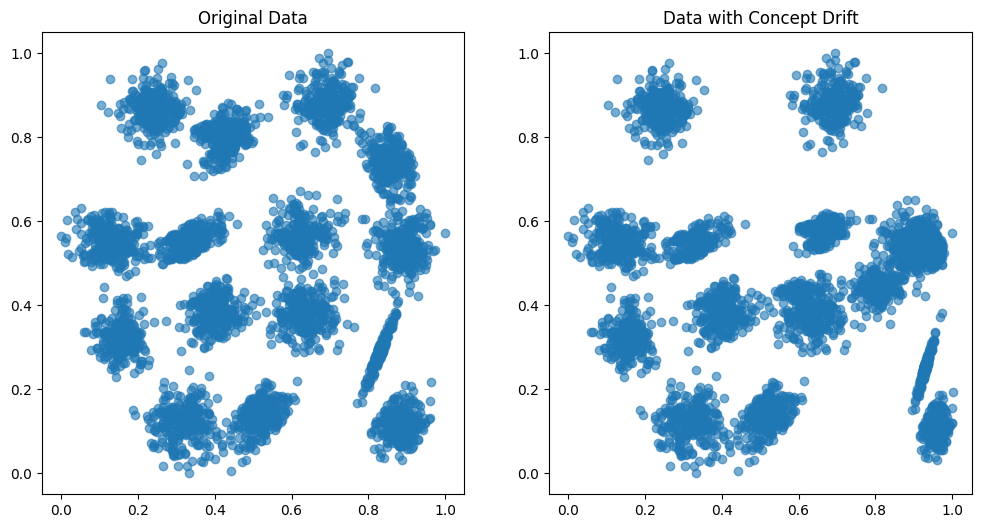

In [60]:
processed_data = pd.read_csv(file_path)
# Create deep copies of the segments to avoid SettingWithCopyWarning
segment_1 = processed_data.iloc[:int(len(processed_data)/3), :].copy()
segment_2 = processed_data.iloc[int(len(processed_data)/3):int(2*len(processed_data)/3), :].copy()
segment_3 = processed_data.iloc[int(2*len(processed_data)/3):, :].copy()

# Mild Concept Drift Transformations
segment_1.loc[:, 'X'] = np.sqrt(segment_1['X']) * 1.02
segment_1.loc[:, 'Y'] = np.log1p(segment_1['Y']) * 0.98


# Reassemble the dataset
processed_data_with_drift = pd.concat([segment_1, segment_2, segment_3]).reset_index(drop=True)

# Visualization code remains the same
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Original data
plt.subplot(1, 2, 1)
plt.scatter(processed_data['X'], processed_data['Y'], alpha=0.6)
plt.title('Original Data')

# Data with concept drift
plt.subplot(1, 2, 2)
plt.scatter(processed_data_with_drift['X'], processed_data_with_drift['Y'], alpha=0.6)
plt.title('Data with Concept Drift')

plt.show()


[9 9 9 9 9]
Predicted Distribution:  Counter({13: 422, 14: 396, 12: 351, 0: 351, 7: 350, 10: 345, 4: 341, 6: 340, 8: 334, 11: 325, 9: 317, 3: 316, 1: 314, 5: 262, 2: 236})
Counter({13: 350, 14: 350, 15: 350, 12: 349, 11: 347, 10: 342, 9: 341, 8: 338, 7: 334, 6: 326, 5: 325, 4: 318, 2: 316, 3: 314, 1: 300})


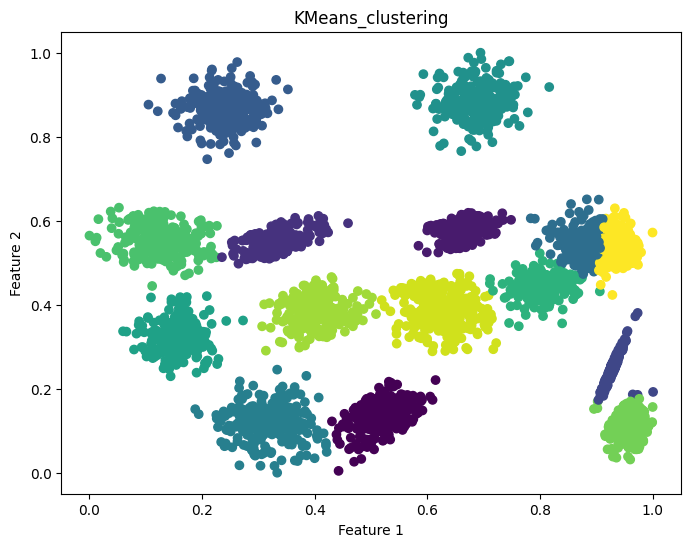

Confusion Matrix:


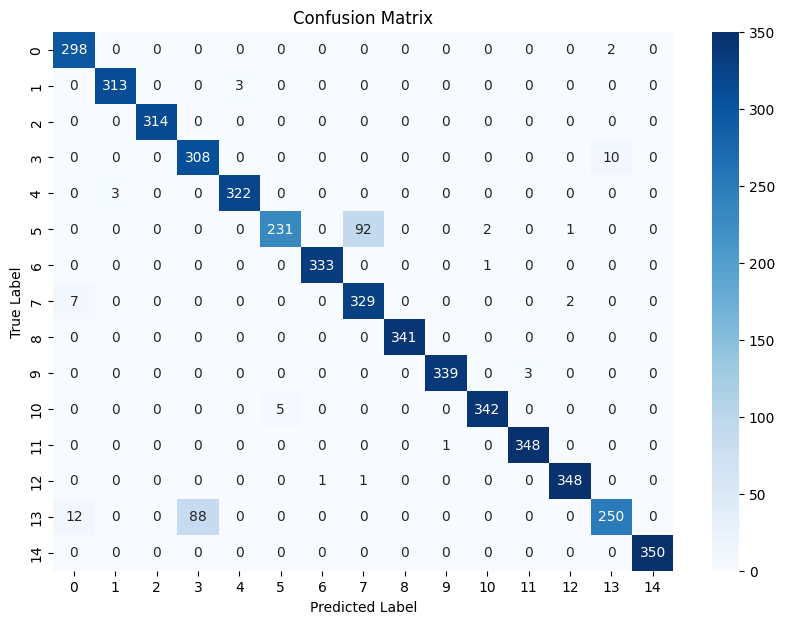


Overall Accuracy: 95.32%
This represents the proportion of all data points that were correctly grouped by the clustering algorithm.


In [61]:

start_time = time.time()

kmeans_clustering = KMeans(n_clusters=N_CLASSES, random_state=42, n_init=10)
labels_pred = kmeans_clustering.fit_predict(processed_data_with_drift)

# Measure elapsed time
end_time = time.time()
running_time = end_time - start_time
running_time_in_seconds = running_time / 60
running_time_in_seconds
print(labels_pred[:5])
cluster_distribution = Counter(labels_pred)
print("Predicted Distribution: ", cluster_distribution)
LABELS_FILE_NAME = 's1-label'
labels_true = load_labels_from_file(rf'..\data\label\{LABELS_FILE_NAME}.pa', len(labels_pred))
cluster_distribution = Counter(labels_true)
print(cluster_distribution)
clustering_algorithm_name = 'KMeans_clustering'
dataset_name = DATASET_FILE_NAME
results_path = r'../results/metrics/results.csv'
plot_clusters(processed_data_with_drift, labels_pred, title=clustering_algorithm_name)
labels_pred = map_clusters_to_ground_truth(labels_true, labels_pred)
generate_confusion_matrix(labels_true, labels_pred, N_CLASSES)
algorithm_params = kmeans_clustering.get_params()
algorithm_details = str(algorithm_params)
# Evaluate and save results
evaluate_clustering(X=processed_data_with_drift, labels_true=labels_true, labels_pred=labels_pred,
                    clus_algo_name=clustering_algorithm_name, dataset_name=dataset_name,
                    results_path=results_path, algorithm_details=algorithm_details,
                    running_time=running_time)

### Moderate concept drift

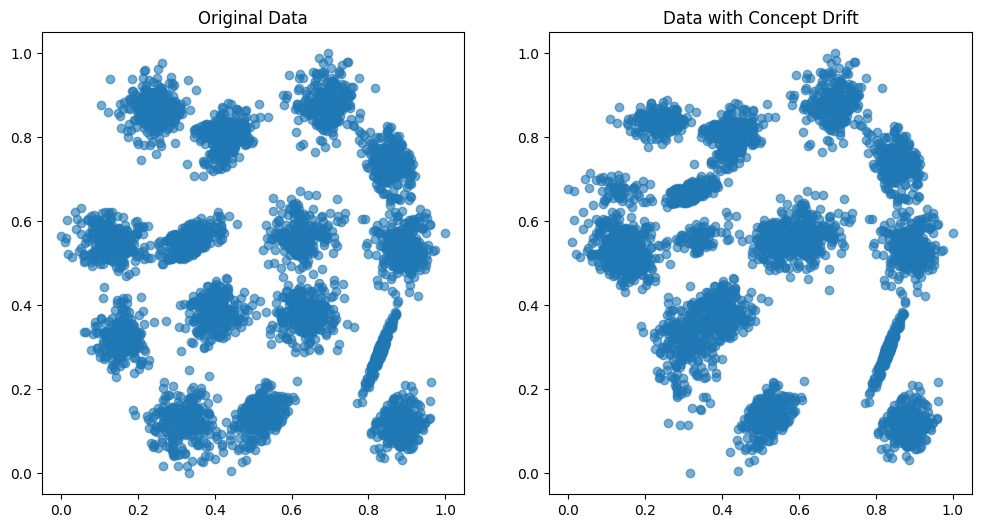

[7 7 7 7 7]
Predicted Distribution:  Counter({1: 569, 14: 367, 3: 355, 5: 353, 6: 351, 0: 349, 8: 341, 12: 335, 4: 327, 10: 325, 11: 318, 9: 312, 2: 311, 7: 272, 13: 115})
Counter({13: 350, 14: 350, 15: 350, 12: 349, 11: 347, 10: 342, 9: 341, 8: 338, 7: 334, 6: 326, 5: 325, 4: 318, 2: 316, 3: 314, 1: 300})


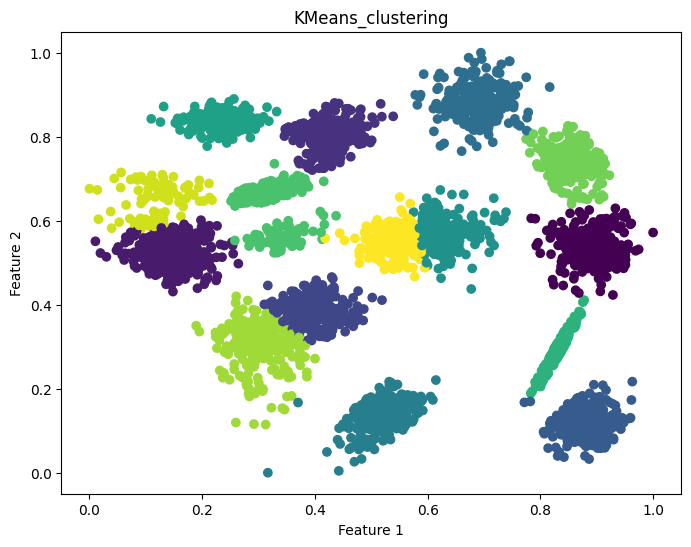

Confusion Matrix:


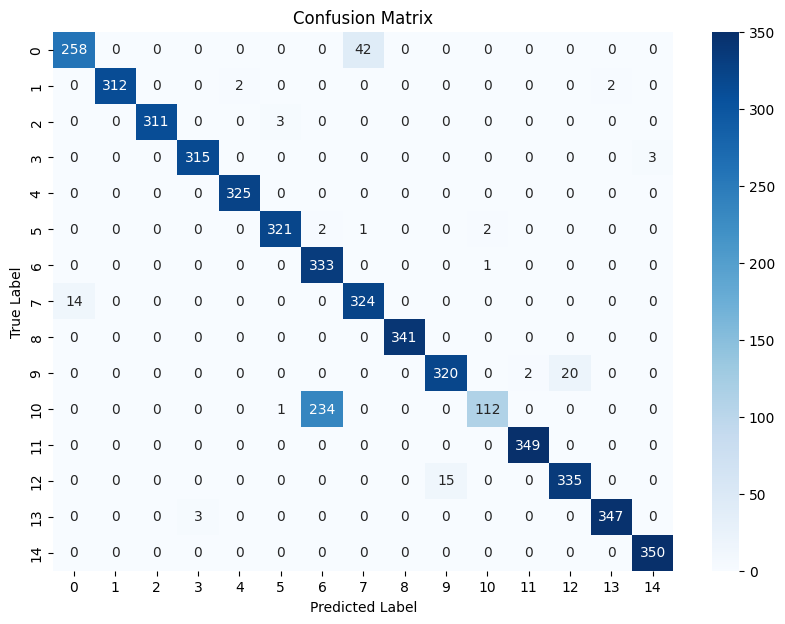


Overall Accuracy: 93.06%
This represents the proportion of all data points that were correctly grouped by the clustering algorithm.


In [62]:
processed_data = pd.read_csv(file_path)
# Slice
# Create deep copies of the segments to avoid SettingWithCopyWarning
segment_1 = processed_data.iloc[:int(len(processed_data) / 3), :].copy()
segment_2 = processed_data.iloc[int(len(processed_data) / 3):int(2 * len(processed_data) / 3), :].copy()
segment_3 = processed_data.iloc[int(2 * len(processed_data) / 3):, :].copy()


# Moderate Concept Drift Transformations
segment_2.loc[:, 'X'] = np.log1p(segment_2['X']) * 1.1
segment_2.loc[:, 'Y'] = np.sqrt(segment_2['Y']) * 0.9




# Reassemble the dataset
processed_data_with_drift = pd.concat([segment_1, segment_2, segment_3]).reset_index(drop=True)

# Visualization code remains the same
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Original data
plt.subplot(1, 2, 1)
plt.scatter(processed_data['X'], processed_data['Y'], alpha=0.6)
plt.title('Original Data')

# Data with concept drift
plt.subplot(1, 2, 2)
plt.scatter(processed_data_with_drift['X'], processed_data_with_drift['Y'], alpha=0.6)
plt.title('Data with Concept Drift')

plt.show()

start_time = time.time()

kmeans_clustering = KMeans(n_clusters=N_CLASSES, random_state=42, n_init=10)
labels_pred = kmeans_clustering.fit_predict(processed_data_with_drift)

# Measure elapsed time
end_time = time.time()
running_time = end_time - start_time
running_time_in_seconds = running_time / 60
running_time_in_seconds
print(labels_pred[:5])
cluster_distribution = Counter(labels_pred)
print("Predicted Distribution: ", cluster_distribution)
LABELS_FILE_NAME = 's1-label'
labels_true = load_labels_from_file(rf'..\data\label\{LABELS_FILE_NAME}.pa', len(labels_pred))
cluster_distribution = Counter(labels_true)
print(cluster_distribution)
clustering_algorithm_name = 'KMeans_clustering'
dataset_name = DATASET_FILE_NAME
results_path = r'../results/metrics/results.csv'
plot_clusters(processed_data_with_drift, labels_pred, title=clustering_algorithm_name)
labels_pred = map_clusters_to_ground_truth(labels_true, labels_pred)
generate_confusion_matrix(labels_true, labels_pred, N_CLASSES)
algorithm_params = kmeans_clustering.get_params()
algorithm_details = str(algorithm_params)
# Evaluate and save results
evaluate_clustering(X=processed_data_with_drift, labels_true=labels_true, labels_pred=labels_pred,
                    clus_algo_name=clustering_algorithm_name, dataset_name=dataset_name,
                    results_path=results_path, algorithm_details=algorithm_details,
                    running_time=running_time)

### Severe Concept drift

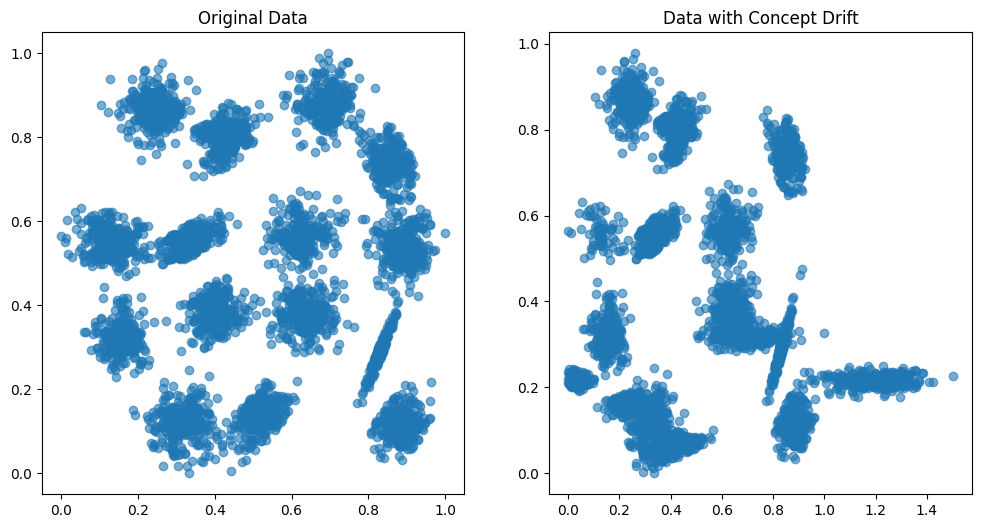

[0 0 0 0 0]
Predicted Distribution:  Counter({12: 593, 1: 447, 2: 365, 14: 362, 3: 341, 8: 338, 5: 337, 11: 333, 7: 324, 6: 318, 9: 314, 0: 298, 10: 279, 4: 269, 13: 82})
Counter({13: 350, 14: 350, 15: 350, 12: 349, 11: 347, 10: 342, 9: 341, 8: 338, 7: 334, 6: 326, 5: 325, 4: 318, 2: 316, 3: 314, 1: 300})


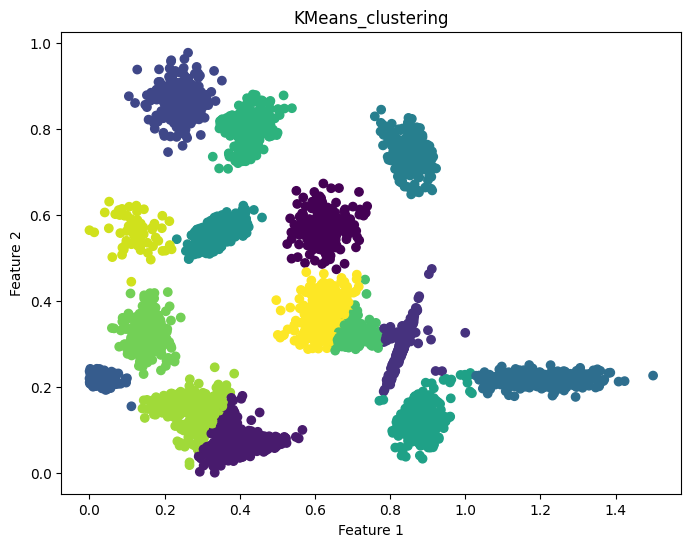

Confusion Matrix:


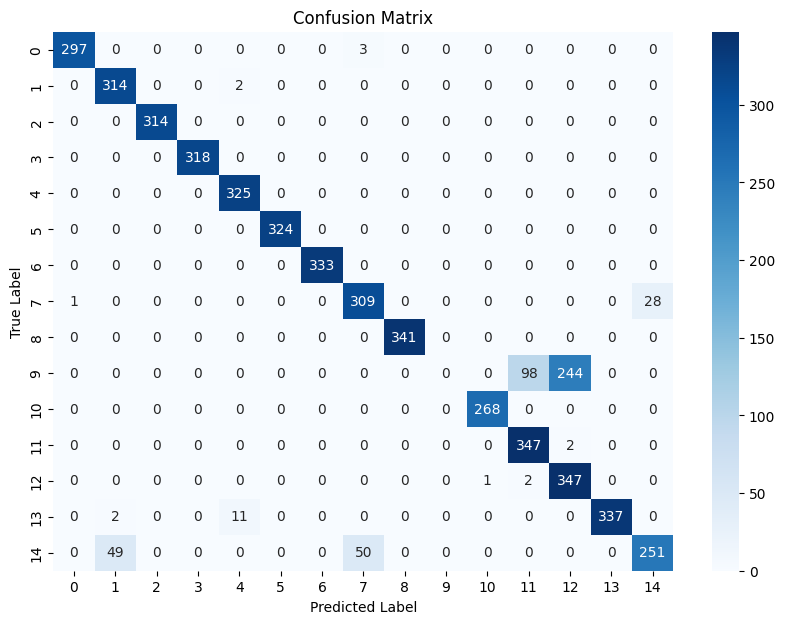


Overall Accuracy: 88.50%
This represents the proportion of all data points that were correctly grouped by the clustering algorithm.


In [63]:
processed_data = pd.read_csv(file_path)
# Slice
# Create deep copies of the segments to avoid SettingWithCopyWarning
segment_1 = processed_data.iloc[:int(len(processed_data) / 3), :].copy()
segment_2 = processed_data.iloc[int(len(processed_data) / 3):int(2 * len(processed_data) / 3), :].copy()
segment_3 = processed_data.iloc[int(2 * len(processed_data) / 3):, :].copy()


# Severe Concept Drift Transformations
segment_3.loc[:, 'X'] = np.power(segment_3['X'], 2) * 1.5
segment_3.loc[:, 'Y'] = np.log1p(segment_3['Y']) * 0.5



# Reassemble the dataset
processed_data_with_drift = pd.concat([segment_1, segment_2, segment_3]).reset_index(drop=True)

# Visualization code remains the same
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Original data
plt.subplot(1, 2, 1)
plt.scatter(processed_data['X'], processed_data['Y'], alpha=0.6)
plt.title('Original Data')

# Data with concept drift
plt.subplot(1, 2, 2)
plt.scatter(processed_data_with_drift['X'], processed_data_with_drift['Y'], alpha=0.6)
plt.title('Data with Concept Drift')

plt.show()

start_time = time.time()

kmeans_clustering = KMeans(n_clusters=N_CLASSES, random_state=42, n_init=10)
labels_pred = kmeans_clustering.fit_predict(processed_data_with_drift)

# Measure elapsed time
end_time = time.time()
running_time = end_time - start_time
running_time_in_seconds = running_time / 60
running_time_in_seconds
print(labels_pred[:5])
cluster_distribution = Counter(labels_pred)
print("Predicted Distribution: ", cluster_distribution)
LABELS_FILE_NAME = 's1-label'
labels_true = load_labels_from_file(rf'..\data\label\{LABELS_FILE_NAME}.pa', len(labels_pred))
cluster_distribution = Counter(labels_true)
print(cluster_distribution)
clustering_algorithm_name = 'KMeans_clustering'
dataset_name = DATASET_FILE_NAME
results_path = r'../results/metrics/results.csv'
plot_clusters(processed_data_with_drift, labels_pred, title=clustering_algorithm_name)
labels_pred = map_clusters_to_ground_truth(labels_true, labels_pred)
generate_confusion_matrix(labels_true, labels_pred, N_CLASSES)
algorithm_params = kmeans_clustering.get_params()
algorithm_details = str(algorithm_params)
# Evaluate and save results
evaluate_clustering(X=processed_data_with_drift, labels_true=labels_true, labels_pred=labels_pred,
                    clus_algo_name=clustering_algorithm_name, dataset_name=dataset_name,
                    results_path=results_path, algorithm_details=algorithm_details,
                    running_time=running_time)

## Covariant Shift

### Mild covariant shift

[3 3 3 3 3]
Predicted Distribution:  Counter({8: 374, 4: 368, 10: 366, 0: 354, 7: 352, 5: 352, 9: 346, 12: 342, 2: 337, 6: 331, 11: 318, 13: 315, 3: 300, 14: 278, 1: 267})
Counter({13: 350, 14: 350, 15: 350, 12: 349, 11: 347, 10: 342, 9: 341, 8: 338, 7: 334, 6: 326, 5: 325, 4: 318, 2: 316, 3: 314, 1: 300})


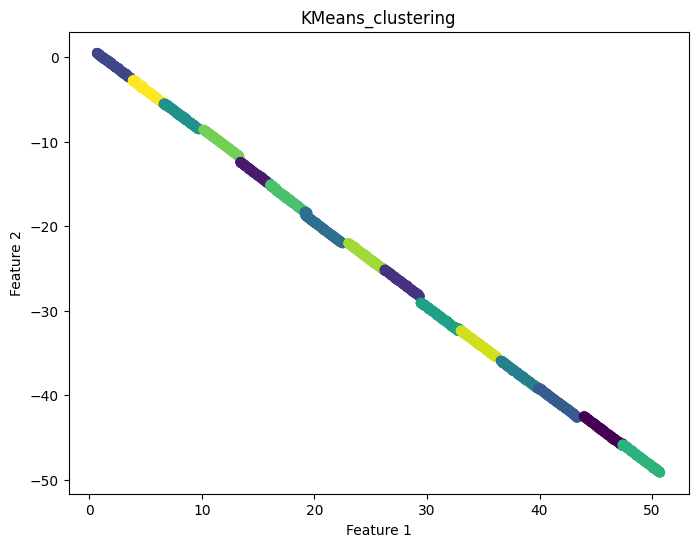

Confusion Matrix:


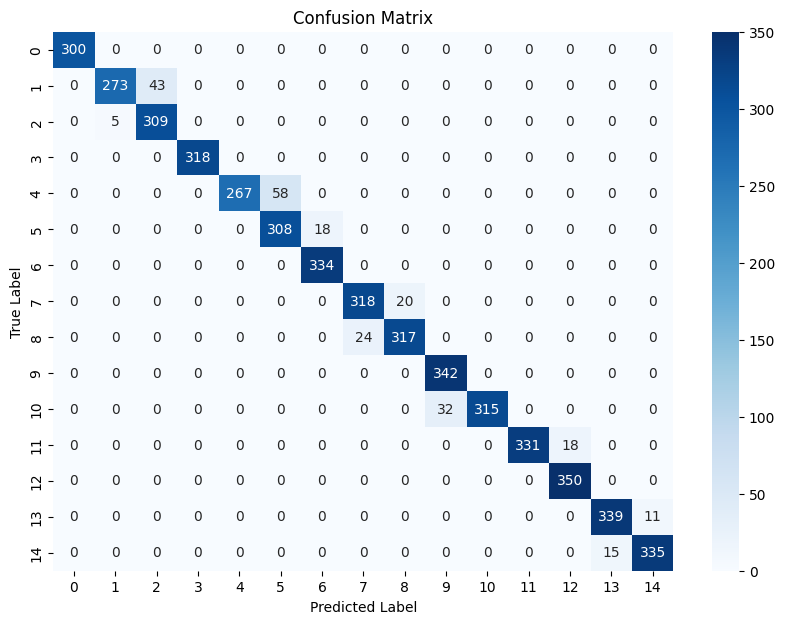


Overall Accuracy: 95.12%
This represents the proportion of all data points that were correctly grouped by the clustering algorithm.


In [76]:
processed_data = pd.read_csv(file_path)

# mild_scaling_x = 1.02
# mild_scaling_y = 0.98
mild_trend_x = 0.01
mild_trend_y = -0.01
# mild_shift_x = 0.02
# mild_shift_y = -0.02

processed_data['X'] = processed_data['X'] * mild_scaling_x + np.arange(len(processed_data)) * mild_trend_x + mild_shift_x
processed_data['Y'] = processed_data['Y'] * mild_scaling_y + np.arange(len(processed_data)) * mild_trend_y + mild_shift_y


start_time = time.time()

kmeans_clustering = KMeans(n_clusters=N_CLASSES, random_state=42, n_init=10)
labels_pred = kmeans_clustering.fit_predict(processed_data)

# Measure elapsed time
end_time = time.time()
running_time = end_time - start_time
running_time_in_seconds = running_time / 60
running_time_in_seconds
print(labels_pred[:5])
cluster_distribution = Counter(labels_pred)
print("Predicted Distribution: ", cluster_distribution)
LABELS_FILE_NAME = 's1-label'
labels_true = load_labels_from_file(rf'..\data\label\{LABELS_FILE_NAME}.pa', len(labels_pred))
cluster_distribution = Counter(labels_true)
print(cluster_distribution)
clustering_algorithm_name = 'KMeans_clustering'
dataset_name = DATASET_FILE_NAME
results_path = r'../results/metrics/results.csv'
plot_clusters(processed_data, labels_pred, title=clustering_algorithm_name)
labels_pred = map_clusters_to_ground_truth(labels_true, labels_pred)
generate_confusion_matrix(labels_true, labels_pred, N_CLASSES)
algorithm_params = kmeans_clustering.get_params()
algorithm_details = str(algorithm_params)
# Evaluate and save results
evaluate_clustering(X=processed_data, labels_true=labels_true, labels_pred=labels_pred,
                    clus_algo_name=clustering_algorithm_name, dataset_name=dataset_name,
                    results_path=results_path, algorithm_details=algorithm_details,
                    running_time=running_time)

### Moderate covariant shift

[0 0 0 0 0]
Predicted Distribution:  Counter({6: 358, 1: 353, 3: 351, 2: 350, 12: 340, 8: 338, 11: 336, 4: 333, 14: 330, 7: 330, 13: 319, 5: 318, 9: 316, 0: 314, 10: 314})
Counter({13: 350, 14: 350, 15: 350, 12: 349, 11: 347, 10: 342, 9: 341, 8: 338, 7: 334, 6: 326, 5: 325, 4: 318, 2: 316, 3: 314, 1: 300})


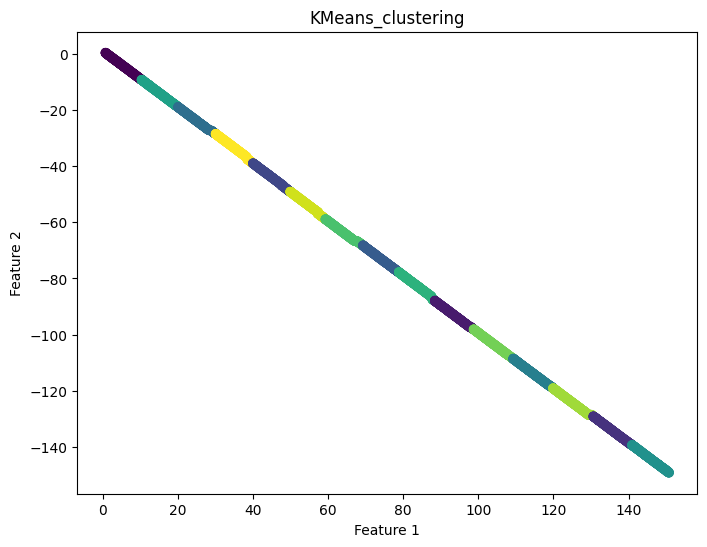

Confusion Matrix:


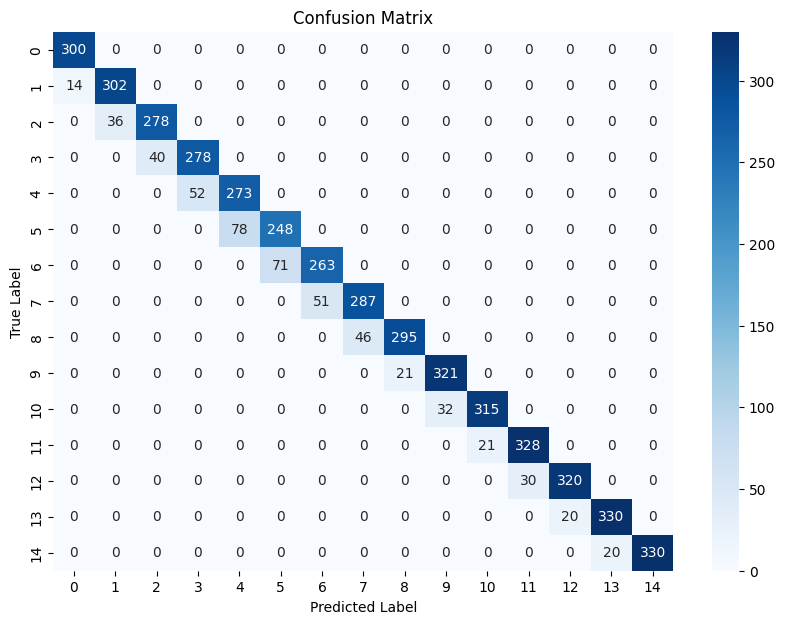


Overall Accuracy: 89.36%
This represents the proportion of all data points that were correctly grouped by the clustering algorithm.


In [65]:
processed_data = pd.read_csv(file_path)

moderate_scaling_x = 1.1
moderate_scaling_y = 0.9
moderate_trend_x = 0.03
moderate_trend_y = -0.03
moderate_shift_x = 0.05
moderate_shift_y = -0.05


processed_data['X'] = processed_data['X'] * moderate_scaling_x + np.arange(len(processed_data)) * moderate_trend_x + moderate_shift_x
processed_data['Y'] = processed_data['Y'] * moderate_scaling_y + np.arange(len(processed_data)) * moderate_trend_y + moderate_shift_y


start_time = time.time()

kmeans_clustering = KMeans(n_clusters=N_CLASSES, random_state=42, n_init=10)
labels_pred = kmeans_clustering.fit_predict(processed_data)

# Measure elapsed time
end_time = time.time()
running_time = end_time - start_time
running_time_in_seconds = running_time / 60
running_time_in_seconds
print(labels_pred[:5])
cluster_distribution = Counter(labels_pred)
print("Predicted Distribution: ", cluster_distribution)
LABELS_FILE_NAME = 's1-label'
labels_true = load_labels_from_file(rf'..\data\label\{LABELS_FILE_NAME}.pa', len(labels_pred))
cluster_distribution = Counter(labels_true)
print(cluster_distribution)
clustering_algorithm_name = 'KMeans_clustering'
dataset_name = DATASET_FILE_NAME
results_path = r'../results/metrics/results.csv'
plot_clusters(processed_data, labels_pred, title=clustering_algorithm_name)
labels_pred = map_clusters_to_ground_truth(labels_true, labels_pred)
generate_confusion_matrix(labels_true, labels_pred, N_CLASSES)
algorithm_params = kmeans_clustering.get_params()
algorithm_details = str(algorithm_params)
# Evaluate and save results
evaluate_clustering(X=processed_data, labels_true=labels_true, labels_pred=labels_pred,
                    clus_algo_name=clustering_algorithm_name, dataset_name=dataset_name,
                    results_path=results_path, algorithm_details=algorithm_details,
                    running_time=running_time)

### Severe Covariant shift

[0 0 0 0 0]
Predicted Distribution:  Counter({6: 351, 1: 346, 11: 345, 2: 343, 12: 342, 3: 337, 7: 335, 14: 334, 8: 329, 9: 329, 5: 328, 4: 325, 13: 323, 0: 318, 10: 315})
Counter({13: 350, 14: 350, 15: 350, 12: 349, 11: 347, 10: 342, 9: 341, 8: 338, 7: 334, 6: 326, 5: 325, 4: 318, 2: 316, 3: 314, 1: 300})


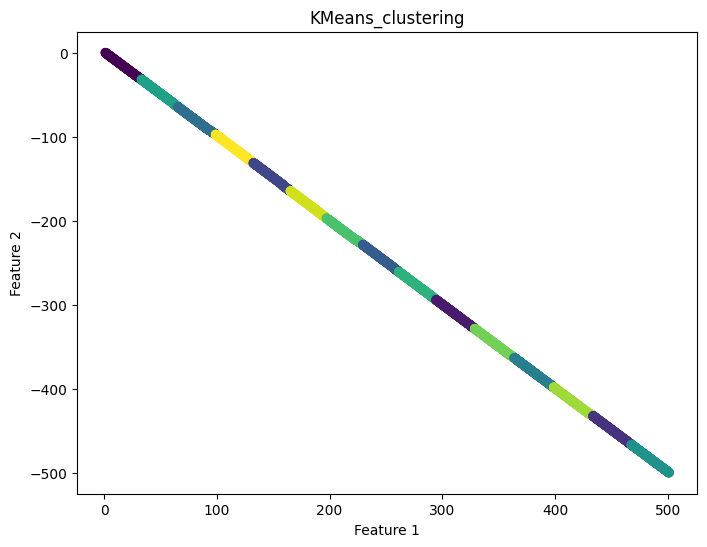

Confusion Matrix:


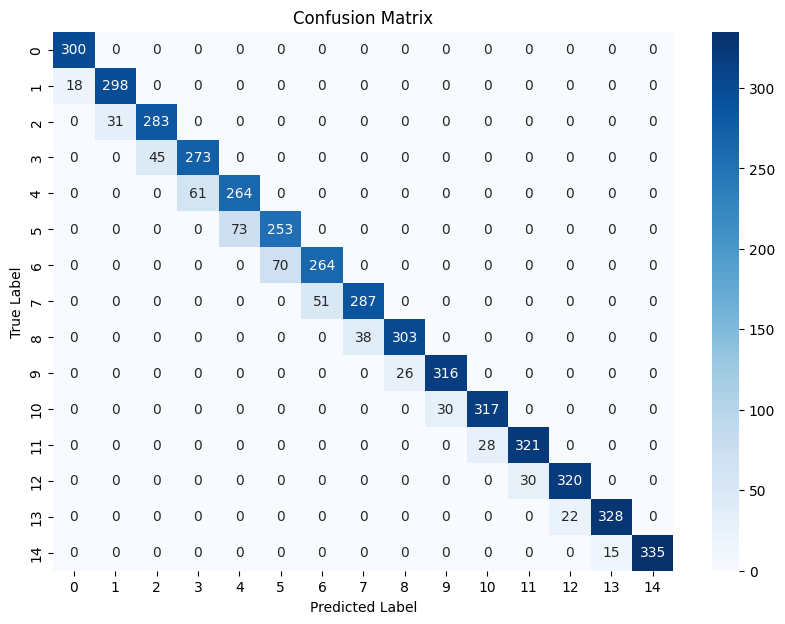


Overall Accuracy: 89.24%
This represents the proportion of all data points that were correctly grouped by the clustering algorithm.


In [66]:
processed_data = pd.read_csv(file_path)

severe_scaling_x = 1.5
severe_scaling_y = 0.5
severe_trend_x = 0.1
severe_trend_y = -0.1
severe_shift_x = 0.2
severe_shift_y = -0.2

processed_data['X'] = processed_data['X'] * severe_scaling_x + np.arange(len(processed_data)) * severe_trend_x + severe_shift_x
processed_data['Y'] = processed_data['Y'] * severe_scaling_y + np.arange(len(processed_data)) * severe_trend_y + severe_shift_y


start_time = time.time()

kmeans_clustering = KMeans(n_clusters=N_CLASSES, random_state=42, n_init=10)
labels_pred = kmeans_clustering.fit_predict(processed_data)

# Measure elapsed time
end_time = time.time()
running_time = end_time - start_time
running_time_in_seconds = running_time / 60
running_time_in_seconds
print(labels_pred[:5])
cluster_distribution = Counter(labels_pred)
print("Predicted Distribution: ", cluster_distribution)
LABELS_FILE_NAME = 's1-label'
labels_true = load_labels_from_file(rf'..\data\label\{LABELS_FILE_NAME}.pa', len(labels_pred))
cluster_distribution = Counter(labels_true)
print(cluster_distribution)
clustering_algorithm_name = 'KMeans_clustering'
dataset_name = DATASET_FILE_NAME
results_path = r'../results/metrics/results.csv'
plot_clusters(processed_data, labels_pred, title=clustering_algorithm_name)
labels_pred = map_clusters_to_ground_truth(labels_true, labels_pred)
generate_confusion_matrix(labels_true, labels_pred, N_CLASSES)
algorithm_params = kmeans_clustering.get_params()
algorithm_details = str(algorithm_params)
# Evaluate and save results
evaluate_clustering(X=processed_data, labels_true=labels_true, labels_pred=labels_pred,
                    clus_algo_name=clustering_algorithm_name, dataset_name=dataset_name,
                    results_path=results_path, algorithm_details=algorithm_details,
                    running_time=running_time)

In [67]:
processed_data = pd.read_csv(file_path)

from sklearn.model_selection import train_test_split
# Split the data into train and temp (temp will contain both validate and test)
train_data, temp_data, train_labels, temp_labels = train_test_split(
    processed_data, labels_true, train_size=0.5, random_state=42)

# Split the temp data into validate and test
validate_data, test_data, validate_labels, test_labels = train_test_split(
    temp_data, temp_labels, train_size=0.5, random_state=42)

In [68]:
test_data.describe()

,X,Y
count,1250.000000,1250.000000
mean,0.533802,0.482006
std,0.256963,0.257339
min,0.000000,0.049388
25%,0.323580,0.292954
50%,0.530117,0.519175
75%,0.817945,0.728616
max,1.000000,0.984878


In [69]:
test_data.head()

,X,Y
3048,0.308554,0.098404
3381,0.255023,0.521325
309,0.829503,0.288287
631,0.430334,0.785681
1350,0.947004,0.118794


In [70]:
test_data['X']

3048    0.308554
3381    0.255023
309     0.829503
631     0.430334
1350    0.947004
          ...   
1670    0.344899
598     0.829336
4575    0.823756
3326    0.125555
2317    0.647430
Name: X, Length: 1250, dtype: float64

In [71]:
#TODO Identify unsupervised metrics and supervised metrics
#TODO Find how others tune clustering parameters using unsupervised metrics
#TODO Run the analysis for s-sets s1 dataset for the first 50 datapoints
#TODO Run the analysis for s-sets s1 dataset for picked hyper parameters
#TODO The goal is to monitor the performance of a clustering algorithm in a manner that is robust to data drift, even in the absence of ground truth.
#TODO Is there any metrics such as above

In [72]:
"""
Goals / Research Questions:
1. If we can monitor the performance of the clustering algorithm when the data distribution has no issue? And which metric is the best for people to know/use. 
2. If we can monitor the performance of the clustering algorithm when the data distribution has distribution change? And which metric is the best for people to know/use in this case.

Plan: 
[done] methods
[done] datasets
[in progress] hyperparameter tuning (1 weeks).. search to see how other tune parameters for clustering alg. (grid search may work)
[in progress] metrics with/without ground-truths (1 weeks) ,Mapping with metric and accuracy
[todo] finalize goal 1 (2 weeks, end of Feb.)
[todo] do distribution change -> data
[todo] observe the metrics to see if it indicates the performance degradation.
"""

'\nGoals / Research Questions:\n1. If we can monitor the performance of the clustering algorithm when the data distribution has no issue? And which metric is the best for people to know/use. \n2. If we can monitor the performance of the clustering algorithm when the data distribution has distribution change? And which metric is the best for people to know/use in this case.\n\nPlan: \n[done] methods\n[done] datasets\n[in progress] hyperparameter tuning (1 weeks).. search to see how other tune parameters for clustering alg. (grid search may work)\n[in progress] metrics with/without ground-truths (1 weeks) ,Mapping with metric and accuracy\n[todo] finalize goal 1 (2 weeks, end of Feb.)\n[todo] do distribution change -> data\n[todo] observe the metrics to see if it indicates the performance degradation.\n'

In [73]:
"""

"""

'\n\n'